# Coursework 2- Product Recommendation System

In [50]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVecDDtorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


In [51]:
#Importing the Dataset

#Here, we import the dataset which is stored in our local folder in csv format. 

In [52]:
#Loading the dataset
amazon_ratings = pd.read_csv('ProductData.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head(20)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [53]:
amazon_ratings.shape

(2023070, 4)

In [54]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='ProductId'>

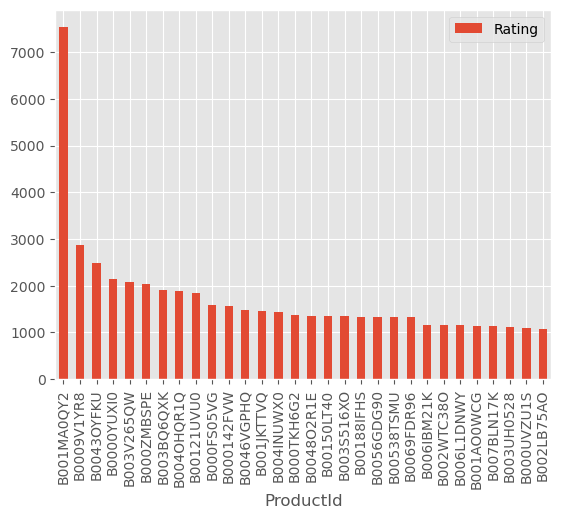

In [55]:
most_popular.head(30).plot(kind = "bar")

In [56]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [57]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
ratings_utility_matrix.shape

(9697, 886)

In [59]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X.shape

(886, 9697)

In [61]:
X1 = X

In [62]:
#Decomposing the Matrix
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [63]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [64]:
X.index[99]

'6117036094'

In [65]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [66]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [67]:
#Recommending top 10 highly correleated products in sequence

In [68]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['9602344954',
 '9788078389',
 '9788080928',
 '9790779968',
 '9790780117',
 '9790781369',
 '9790798261',
 '9790800525',
 '9790801149']

# Item to Item based recommendation system based on product description

In [69]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(30, 3)

In [70]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()



,Product ID,Product Name,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Sports & Outdoors | Outdoor Recreation | Skate...
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games | Learning & Education | Science ...
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,Toys & Games | Arts & Crafts | Craft Kits
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,Toys & Games | Hobbies | Models & Model Kits |...
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,Toys & Games | Puzzles | Jigsaw Puzzles


In [71]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["Product Description"].head(10)

0     Sports & Outdoors | Outdoor Recreation | Skate...
1     Toys & Games | Learning & Education | Science ...
2             Toys & Games | Arts & Crafts | Craft Kits
3     Toys & Games | Hobbies | Models & Model Kits |...
4               Toys & Games | Puzzles | Jigsaw Puzzles
6     Clothing, Shoes & Jewelry | Costumes & Accesso...
7     Toys & Games | Arts & Crafts | Drawing & Paint...
8     Home & Kitchen | Home Décor | Window Treatment...
10                   Toys & Games | Baby & Toddler Toys
11    Toys & Games | Collectible Toys | Statues, Bob...
Name: Product Description, dtype: object

In [72]:
#Feature extraction from product descriptions
# Converting the text in product description into numerical data for analysis

In [73]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["Product Description"])
X1

<28x87 sparse matrix of type '<class 'numpy.float64'>'
	with 171 stored elements in Compressed Sparse Row format>

In [74]:
#Visualizing product clusters in subset of data

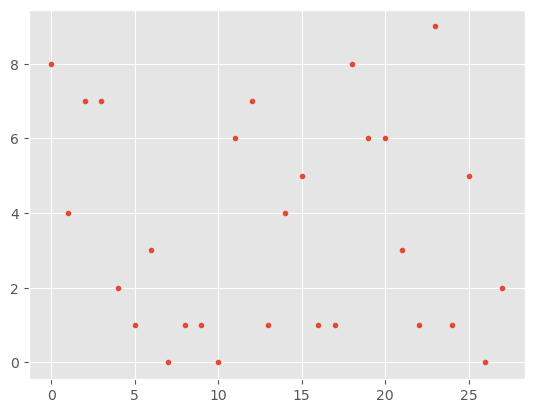

In [75]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [76]:
#Top words in each cluster based on product description

In [77]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 costumes
 accessories
 shoes
 jewelry
 clothing
 girls
 kids
 baby
 games
 electronics
Cluster 1:
 toys
 toddler
 games
 baby
 musical
 party
 electronics
 statues
 kids
 teaching
Cluster 2:
 kits
 arts
 crafts
 craft
 games
 toys
 model
 painting
 drawing
 crayons
Cluster 3:
 tables
 furniture
 chairs
 kitchen
 home
 kids
 girls
 education
 electronics
 films
Cluster 4:
 linkages
 tools
 rc
 hardware
 hobby
 hobbies
 building
 toys
 games
 jet
Cluster 5:
 puzzles
 jigsaw
 toys
 games
 window
 girls
 education
 electronics
 films
 flash
Cluster 6:
 learning
 education
 toys
 science
 cards
 flash
 kits
 games
 electronics
 films
Cluster 7:
 décor
 window
 home
 nursery
 products
 treatments
 baby
 kitchen
 films
 valances
Cluster 8:
 building
 sets
 toys
 games
 kids
 girls
 décor
 education
 electronics
 films
Cluster 9:
 sports
 outdoor
 skateboards
 longboards
 slumber
 play
 bags
 standard
 skateboarding
 skates


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [78]:
#Predicting cluster based on key search words

In [79]:
print("Cluster ID:")
Y = vectorizer.transform(["games"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [80]:
print("Cluster ID:")
Y = vectorizer.transform(["electronics"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [81]:
print("Cluster ID:")
Y = vectorizer.transform(["films"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[7]


In [82]:
print("Cluster ID:")
Y = vectorizer.transform(["furniture"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[3]
